In [1]:
import datetime

import pandas as pd
import seaborn as sns

# Data Science: First Steps

## The problem: planning deliveries in Manhattan

### How does this differ from a typical directions application?
* Plan many deliveries at once
* Fixed number of packages to deliver in one day

### What makes a good route?
* Closely packed deliveries
* Fast
* Reliable

## Acquiring data

### Road map


https://data.cityofnewyork.us/City-Government/road/svwp-sbcd

### Traffic

**Historical Data (2014-2018)**: 

https://data.cityofnewyork.us/Transportation/Traffic-Volume-Counts-2014-2018-/ertz-hr4r

**Real-time API**

https://data.cityofnewyork.us/Transportation/Real-Time-Traffic-Speed-Data/qkm5-nuaq

### Collisions (regularly updated)

https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95

## Explore data

### Collisions

In [4]:
df_all = pd.read_csv('data/Motor_Vehicle_Collisions_-_Crashes.csv',
                    low_memory=False)

In [5]:
df = df_all[df_all['BOROUGH'] == 'MANHATTAN'].copy()
df.head(1)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
10,03/22/2020,15:50,MANHATTAN,10001,NaN,NaN,NaN,WEST 35 STREET,6 avenue,NaN,...,Unspecified,NaN,NaN,NaN,4303221,Sedan,Sedan,NaN,NaN,NaN


In [6]:
df['TIMESTAMP'] = df['CRASH DATE'] + ' ' + df['CRASH TIME']

In [8]:
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])

df.head(2)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,TIMESTAMP
10,03/22/2020,15:50,MANHATTAN,10001,NaN,NaN,NaN,WEST 35 STREET,6 avenue,NaN,...,NaN,NaN,NaN,4303221,Sedan,Sedan,NaN,NaN,NaN,2020-03-22 15:50:00
46,03/12/2020,7:49,MANHATTAN,10036,NaN,NaN,NaN,WEST 44 STREET,12 AVENUE,NaN,...,NaN,NaN,NaN,4299206,Sedan,Sedan,NaN,NaN,NaN,2020-03-12 07:49:00


### Missing values

In [9]:
df.isna().head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,TIMESTAMP
10,False,False,False,False,True,True,True,False,False,True,...,True,True,True,False,False,False,True,True,True,False
46,False,False,False,False,True,True,True,False,False,True,...,True,True,True,False,False,False,True,True,True,False
88,False,False,False,False,True,True,True,False,False,True,...,True,True,True,False,False,False,True,True,True,False
100,False,False,False,False,False,False,False,True,True,False,...,True,True,True,False,False,True,True,True,True,False
143,False,False,False,False,False,False,False,False,False,True,...,True,True,True,False,False,False,True,True,True,False


In [10]:
df.isna().mean().head()

CRASH DATE    0.000000
CRASH TIME    0.000000
BOROUGH       0.000000
ZIP CODE      0.000058
LATITUDE      0.030983
dtype: float64

In [11]:
df.isna().mean().sort_values(ascending=False)

CONTRIBUTING FACTOR VEHICLE 5    0.998601
VEHICLE TYPE CODE 5              0.997246
CONTRIBUTING FACTOR VEHICLE 4    0.994688
VEHICLE TYPE CODE 4              0.981869
CONTRIBUTING FACTOR VEHICLE 3    0.968256
VEHICLE TYPE CODE 3              0.953810
OFF STREET NAME                  0.845340
CROSS STREET NAME                0.154957
ON STREET NAME                   0.154715
VEHICLE TYPE CODE 2              0.154450
CONTRIBUTING FACTOR VEHICLE 2    0.135033
LOCATION                         0.030983
LONGITUDE                        0.030983
LATITUDE                         0.030983
VEHICLE TYPE CODE 1              0.004007
CONTRIBUTING FACTOR VEHICLE 1    0.003504
ZIP CODE                         0.000058
NUMBER OF PERSONS KILLED         0.000022
NUMBER OF PERSONS INJURED        0.000011
BOROUGH                          0.000000
CRASH TIME                       0.000000
TIMESTAMP                        0.000000
NUMBER OF CYCLIST INJURED        0.000000
NUMBER OF PEDESTRIANS INJURED    0

### Filtering:  collisions during delivery hours

In [12]:
df['HOUR'] = df['TIMESTAMP'].dt.hour

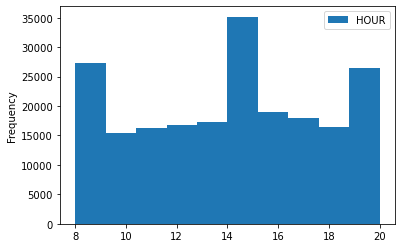

In [13]:
df = df[(df['HOUR'] >= 8) & (df['HOUR'] <= 20)]
df[['HOUR']].plot.hist()

### Intersections:  `ON STREET` and `CROSS STREET`

**Missing values in at least one column**

In [14]:
df['INTERSECTION'] = (df['ON STREET NAME'].str.strip() 
                      + ' / '
                      + df['CROSS STREET NAME'].str.strip())

In [15]:
df['INTERSECTION'].value_counts()[:20]

WEST 42 STREET / 8 AVENUE          333
EAST 37 STREET / 3 AVENUE          331
EAST 59 STREET / 2 AVENUE          298
EAST 125 STREET / 2 AVENUE         297
EAST 36 STREET / 2 AVENUE          294
EAST 34 STREET / 2 AVENUE          274
11 AVENUE / WEST 40 STREET         274
EAST 96 STREET / 1 AVENUE          273
WEST 42 STREET / 7 AVENUE          254
WEST 42 STREET / 9 AVENUE          250
CANAL STREET / LAFAYETTE STREET    249
EAST 59 STREET / 3 AVENUE          245
EAST 57 STREET / 2 AVENUE          245
CANAL STREET / BROADWAY            244
WEST 34 STREET / 7 AVENUE          240
WEST 41 STREET / 10 AVENUE         234
EAST 57 STREET / 3 AVENUE          233
WEST 42 STREET / 11 AVENUE         230
WEST 42 STREET / 10 AVENUE         219
WEST 40 STREET / 11 AVENUE         217
Name: INTERSECTION, dtype: int64

### Feature engineering: number of vehicles

In [16]:
vehicle_type_codes = df[[
    'VEHICLE TYPE CODE 1',
    'VEHICLE TYPE CODE 2',
    'VEHICLE TYPE CODE 3',
    'VEHICLE TYPE CODE 4',
    'VEHICLE TYPE CODE 5'
]]

vehicle_type_codes.head()

,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
10,Sedan,Sedan,NaN,NaN,NaN
100,Sedan,NaN,NaN,NaN,NaN
154,Sedan,Taxi,NaN,NaN,NaN
203,Van,NaN,NaN,NaN,NaN
344,Sedan,Taxi,NaN,NaN,NaN


In [17]:
vehicle_type_codes.notna().head()

,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
10,True,True,False,False,False
100,True,False,False,False,False
154,True,True,False,False,False
203,True,False,False,False,False
344,True,True,False,False,False


In [18]:
num_vehicles = vehicle_type_codes.notna().sum(axis=1)
num_vehicles = num_vehicles.to_frame()
num_vehicles.columns=['NUM VEHICLES']

num_vehicles.head()

,NUM VEHICLES
10,2
100,1
154,2
203,1
344,2


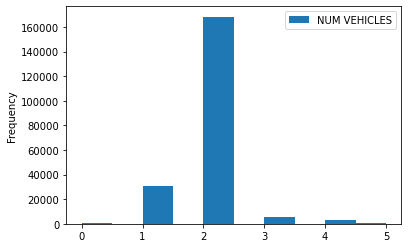

In [19]:
num_vehicles.plot.hist()

### Join to original data frame 

In [20]:
df = df.join(num_vehicles)
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,TIMESTAMP,HOUR,INTERSECTION,NUM VEHICLES
10,03/22/2020,15:50,MANHATTAN,10001,NaN,NaN,NaN,WEST 35 STREET,6 avenue,NaN,...,4303221,Sedan,Sedan,NaN,NaN,NaN,2020-03-22 15:50:00,15,WEST 35 STREET / 6 avenue,2
100,02/24/2020,11:24,MANHATTAN,10032,40.837830,-73.939990,POINT (-73.93999 40.83783),NaN,NaN,1083 SAINT NICHOLAS AVENUE,...,4294698,Sedan,NaN,NaN,NaN,NaN,2020-02-24 11:24:00,11,NaN,1
154,02/07/2020,9:40,MANHATTAN,10035,NaN,NaN,NaN,E 125 STREET,2 AVENUE,NaN,...,4287987,Sedan,Taxi,NaN,NaN,NaN,2020-02-07 09:40:00,9,E 125 STREET / 2 AVENUE,2
203,01/24/2020,11:15,MANHATTAN,10020,NaN,NaN,NaN,WEST 48 STREET,AVENUE OF THE AMERICAS,NaN,...,4278655,Van,NaN,NaN,NaN,NaN,2020-01-24 11:15:00,11,WEST 48 STREET / AVENUE OF THE AMERICAS,1
344,12/19/2019,18:19,MANHATTAN,10004,40.706657,-74.015915,POINT (-74.015915 40.706657),MORRIS STREET,WEST STREET,NaN,...,4265344,Sedan,Taxi,NaN,NaN,NaN,2019-12-19 18:19:00,18,MORRIS STREET / WEST STREET,2


In [21]:
(df.groupby('INTERSECTION')['NUM VEHICLES']
   .agg(['count', 'mean'])
   .sort_values(by='count', ascending=False))[:20]

,count,mean
INTERSECTION,,
WEST 42 STREET / 8 AVENUE,333,1.930931
EAST 37 STREET / 3 AVENUE,331,1.981873
EAST 59 STREET / 2 AVENUE,298,1.979866
EAST 125 STREET / 2 AVENUE,297,1.962963
EAST 36 STREET / 2 AVENUE,294,2.006803
11 AVENUE / WEST 40 STREET,274,1.959854
EAST 34 STREET / 2 AVENUE,274,1.930657
EAST 96 STREET / 1 AVENUE,273,1.956044
WEST 42 STREET / 7 AVENUE,254,1.889764


## What's next?

### Reproducible results

**Virtual environments**: 
- pip
- conda


**Hosting notebooks online**
* Jupyter notebooks on github
* Juptyer notebooks with Binder
    * Considerations for downloading data

### Back to the original problem

* Grouping deliveries by location
    * Heuristic rules
    * Clustering
* Towards a predictive model
    * Predicting best routes: again, what does "best" mean here?
    * What other data could we use?